#**Sample Superstore Dataset Analysis to Improve Profit**

# Importing the libraries

In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [202]:
dataset = pd.read_csv('https://raw.githubusercontent.com/preyash2047/TSF_Task/main/Data%20Science%20Task/Task%203/SampleSuperstore.csv')

# Missing Data Handeling

In [5]:
dataset.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Dataset does not have any missing value.

# Exploring the dataset

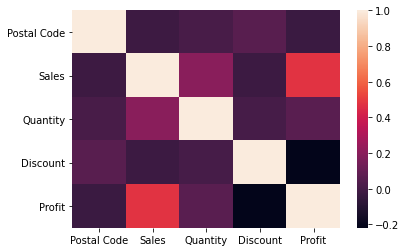

In [ ]:
sns.heatmap(dataset.corr())

**Conclusion**: insufficient relation with numeric values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [15]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [195]:
for i in dataset.columns:
  if i not in ["Postal Code","Sales","Profit"]:
    print(f"{i}: {dataset[i].unique()}\n")

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segment: ['Consumer' 'Corporate' 'Home Office']

Country: ['United States']

City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 

In [ ]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Sales to Profit Comperation


In [34]:
def SalestoProfit(target):
  range = dataset.groupby(target).sum()
  print((range["Profit"]/range["Sales"])*100)
  print("\n")

In [38]:
Category = dataset.groupby(["Category", "Sub-Category"]).sum()
Category

Postal Code        Sales  ...  Discount      Profit
Category        Sub-Category                            ...                      
Furniture       Bookcases        12771539  114879.9963  ...     48.14  -3472.5560
                Chairs           34936229  328449.1030  ...    105.00  26590.1663
                Furnishings      51880430   91705.1640  ...    132.40  13059.1436
                Tables           18607828  206965.5320  ...     83.35 -17725.4811
Office Supplies Appliances       25250538  107532.1610  ...     77.60  18138.0054
                Art              43329658   27118.7920  ...     59.60   6527.7870
                Binders          83626398  203412.7330  ...    567.00  30221.7633
                Envelopes        13325731   16476.4020  ...     20.40   6964.1767
                Fasteners        12506063    3024.2800  ...     17.80    949.5182
                Labels           19552985   12486.3120  ...     25.00   5546.2540
                Paper            76299221   78479.2060  ...    102.60  34053.5693
                Storage          46248720  223843.6080  ...     63.20  21278.8264
                Supplies         10633558   46673.5380  ...     14.60  -1189.0995
Technology      Accessories      44468434  167380.3180  ...     60.80  41936.6357
                Copiers           3873477  149528.0300  ...     11.00  55617.8249
                Machines          6364668  189238.6310  ...     35.20   3384.7569
                Phones           47897175  330007.0540  ...    137.40  44515.7306

[17 rows x 5 columns]

In [39]:
SalestoProfit(["Category", "Sub-Category"])

Category         Sub-Category
Furniture        Bookcases       -3.022768
                 Chairs           8.095673
                 Furnishings     14.240358
                 Tables          -8.564460
Office Supplies  Appliances      16.867517
                 Art             24.071083
                 Binders         14.857361
                 Envelopes       42.267582
                 Fasteners       31.396504
                 Labels          44.418672
                 Paper           43.391837
                 Storage          9.506113
                 Supplies        -2.547695
Technology       Accessories     25.054700
                 Copiers         37.195585
                 Machines         1.788618
                 Phones          13.489327
dtype: float64




# How to improve Profit to sales ratio for Bookcases?



In [64]:
dataset[dataset["Sub-Category"] == "Bookcases"].groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,7413225,68632.7290,496,29.01,-4435.6382
Corporate,3576136,34005.9243,271,14.00,638.4502
Home Office,1782178,12241.3430,101,5.13,324.6320


In [57]:
dataset[dataset["Sub-Category"] == "Bookcases"][dataset["Segment"] == "Consumer"].groupby("Discount").sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Postal Code,Sales,Quantity,Profit
Discount,,,,
0.00,1653205,15377.980,121,2636.9607
0.15,2681374,14728.018,102,456.5945
0.20,485386,20675.536,110,-226.3762
0.30,422595,2957.094,29,-387.9476
0.32,996382,8283.080,50,-1335.2122
0.50,246509,4767.440,36,-2724.3013
0.70,927774,1843.581,48,-2855.3561


Conclusion: Company Shoud complety stop the Providing discount more then 15 % on Bookcases to Consumer Segment

# How to improve Profit to sales ratio for Tables?


In [54]:
dataset[dataset["Sub-Category"] == "Tables"].groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,9595614,99933.7950,602,42.30,-9728.0378
Corporate,5919724,70871.7175,419,27.55,-4906.4986
Home Office,3092490,36160.0195,220,13.50,-3090.9447


In [68]:
dataset[dataset["Sub-Category"] == "Tables"].groupby("Region").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,4796414,39154.971,262,18.90,-3559.6504
East,1450415,39139.807,271,29.90,-11025.3801
South,1691531,43916.192,227,11.35,-4623.0579
West,10669468,84754.562,481,23.20,1482.6073


In [67]:
dataset[dataset["Sub-Category"] == "Tables"].groupby("Discount").sum()

,Postal Code,Sales,Quantity,Profit
Discount,,,,
0.00,4551597,71578.760,310,13276.2997
0.20,6519033,45430.232,281,-303.5580
0.30,2697681,25182.150,180,-3402.3276
0.40,1811053,45614.406,292,-16187.3968
0.45,362615,5484.974,45,-2493.1111
0.50,2665849,13675.010,133,-8615.3873


Conclusion: Company Shoud complety stop the Providing discount for Tables

# How to improve Profit to sales ratio for Supplies?


In [71]:
dataset[dataset["Sub-Category"] == "Supplies"].groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,5371200,25741.496,359,9.0,-1657.5513
Corporate,3631876,19435.284,202,3.8,338.9264
Home Office,1630482,1496.758,86,1.8,129.5254


In [72]:
dataset[dataset["Sub-Category"] == "Supplies"].groupby("Region").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,2476283,9467.372,122,5.2,-661.8881
East,871489,10760.116,195,3.8,-1155.1352
South,943802,8318.928,92,3.0,1.8773
West,6341984,18127.122,238,2.6,626.0465


In [73]:
dataset[dataset["Sub-Category"] == "Supplies"][dataset["Segment"] == "Consumer"].groupby("Discount").sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Postal Code,Sales,Quantity,Profit
Discount,,,,
0.0,2961827,13001.160,203,837.2333
0.2,2409373,12740.336,156,-2494.7846


Conclusion: Company Shoud complety stop the Providing discount for Supplies to Customer Segmet

# Segment Improvement

In [75]:
dataset.groupby("Segment").sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


In [83]:
dataset.groupby("Segment")["Segment"].count()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Conclusion: Company is advised to incress the customer from Home Office Segment

# Category wise Analysis with Sub-Category, Region, State and Segment

In [199]:
pd.set_option('display.max_rows', None)
#pd.reset_option(“max_columns”)

In [ ]:
region = dataset.groupby(["Category","Sub-Category","Region","State","Segment"]).mean()
region["SalesToProfit"] = (region.Profit/region.Sales)*100
report = region[region.SalesToProfit <= 0]
report

In [193]:
report_data = report.index.values
report_data = [list(i) for i in report_data]
print("Category", np.unique([i[0] for i in report_data]))
print("Sub-Category",np.unique([i[1] for i in report_data]))

Category ['Furniture' 'Office Supplies' 'Technology']
Sub-Category ['Accessories' 'Appliances' 'Binders' 'Bookcases' 'Chairs' 'Fasteners'
 'Furnishings' 'Machines' 'Phones' 'Storage' 'Supplies' 'Tables']


Conclusion: Above Sub-Category requires special attention while giving discount as this category 